### Load the cleaned and processed dataset

In [2]:
import pandas as pd

fraud_dataset_path = r"..\src\data\cleaned\processed\ecommerce_fraud_dataset.csv"

df_fraud_train = pd.read_csv(fraud_dataset_path)

In [3]:
df_fraud_train.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,signup_time_dt,freq_count,freq_count_bins,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_values,country_risk_bins,age_bins
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,2015-02-24 22:55:49,1,1,April,Saturday,2,4506682.0,0.097865,High risk,< 40
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,2015-06-07 20:39:50,1,1,June,Monday,1,17944.0,0.095626,High risk,50 - 59
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,2015-01-01 18:52:44,12,11-15,January,Thursday,18,1.0,0.095626,High risk,50 - 59
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,2015-07-21 07:09:52,1,1,September,Wednesday,18,4361461.0,0.095626,High risk,40 - 49
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,...,2015-05-21 06:03:03,1,1,July,Thursday,8,4240931.0,0.116975,High risk,< 40


### Removing unnecessary rows

In [4]:
# Dropping unnecessary columns
df_fraud_train.drop([
    "user_id",
    "signup_time",
    "purchase_time",
    "purchase_time_dt",
    "signup_time_dt",
    "device_id",
    "age",
    "ip_address",
    "country_risk_values",
    "freq_count"
    ], axis=1, inplace=True)

In [5]:
df_fraud_train.head()

,purchase_value,source,browser,sex,class,country,freq_count_bins,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_bins,age_bins
0,34,SEO,Chrome,M,0,Japan,1,April,Saturday,2,4506682.0,High risk,< 40
1,16,Ads,Chrome,F,0,United States,1,June,Monday,1,17944.0,High risk,50 - 59
2,15,SEO,Opera,M,1,United States,11-15,January,Thursday,18,1.0,High risk,50 - 59
3,39,Ads,Safari,M,0,United States,1,September,Wednesday,18,4361461.0,High risk,40 - 49
4,42,Ads,Chrome,M,0,Canada,1,July,Thursday,8,4240931.0,High risk,< 40


### Converting categorical columns to one hot encoding

In [6]:
X = pd.get_dummies(df_fraud_train.drop("class", axis=1), drop_first=True)
y = df_fraud_train["class"]

In [7]:
X.head()

,purchase_value,purchase_hour,seconds_since_signup,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,...,purchase_week_Thursday,purchase_week_Tuesday,purchase_week_Wednesday,country_risk_bins_Low risk,country_risk_bins_Medium risk,country_risk_bins_Very high risk,age_bins_50 - 59,age_bins_60 - 69,age_bins_< 40,age_bins_> 70
0,34,2,4506682.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,16,1,17944.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,15,18,1.0,False,True,False,False,True,False,True,...,True,False,False,False,False,False,True,False,False,False
3,39,18,4361461.0,False,False,False,False,False,True,True,...,False,False,True,False,False,False,False,False,False,False
4,42,8,4240931.0,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Normalizing X_train and X_test

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

### Trainign a Logistic Regression model

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print(" Train Accuracy : ", int(log_reg.score(X_train, y_train)*1000)/10, "%")

print(" Test Accuracy : " , int(log_reg.score(X_test, y_test)*1000)/10, "%")


 Train Accuracy :  95.1 %
 Test Accuracy :  95.2 %


Text(20.72222222222222, 0.5, 'True')

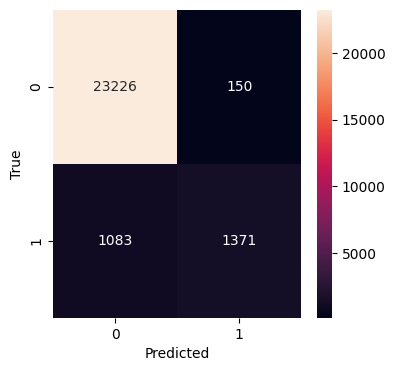

In [13]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1, figsize =(4,4))

# Matrix with threshold by default (50%)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_reg.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('True')


### Training a Random Forset Model

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
# Evalute the performance of the model

train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

print(f"Training accuracy: {train_acc:.2%}")
print(f"Testing accuracy: {test_acc:.2%}")

Training accuracy: 100.00%
Testing accuracy: 95.73%


Text(20.72222222222222, 0.5, 'True')

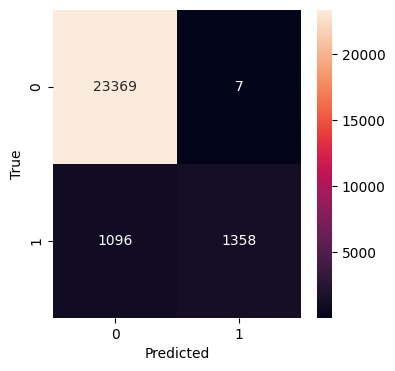

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix

f, ax = plt.subplots(1,1, figsize =(4,4))

# Matrix with threshold by default (50%)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('True')
